<a href="https://colab.research.google.com/github/cbermudez13/eel4815_final_coding_assignment/blob/main/group_1_problem_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.datasets import fashion_mnist
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()
tf.keras.datasets.fashion_mnist.load_data()

number_of_feature = 784
number_of_units_in_hidden_layer = 60000

##feature extraction, with classification 


4422102/4422102 [==============================] - 0s 0us/step


In [3]:
%matplotlib inLine

print('Training data shape: ', train_X.shape, train_Y.shape)

print('Testing data shape: ', test_X.shape, test_Y.shape)

Training data shape:  (60000, 28, 28) (60000,)
Testing data shape:  (10000, 28, 28) (10000,)


In [4]:
# Find the unique numbers from the train labels
classes = np.unique(train_Y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground Truth : 9')

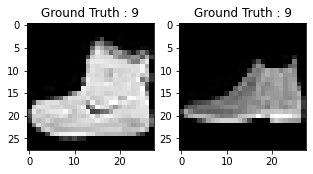

In [5]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

In [6]:
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)
train_X.shape, test_X.shape


((60000, 28, 28, 1), (10000, 28, 28, 1))

In [7]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

In [8]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 9
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [9]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)


In [10]:
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape


((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

In [11]:
import keras
from tensorflow.python.keras.models import Input
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from keras.layers import LeakyReLU


In [12]:
batch_size = 100
epochs = 40
num_classes = 10


In [13]:
fashion_model = Sequential()
fashion_model.add(Conv2D(128, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((4, 4),padding='same'))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(4, 4),padding='same'))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(4, 4),padding='same'))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(Dense(num_classes, activation='softmax'))


In [14]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])


In [15]:
fashion_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 128)       1280      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 28, 28, 128)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 7, 7, 128)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 128)         147584    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 7, 7, 128)         0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 2, 2, 128)        0         
 2D)                                                    

In [16]:
fashion_train = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))


Epoch 1/40
480/480 [==============================] - 12s 8ms/step - loss: 0.5936 - accuracy: 0.7820 - val_loss: 0.3927 - val_accuracy: 0.8618
Epoch 2/40
480/480 [==============================] - 4s 7ms/step - loss: 0.3335 - accuracy: 0.8781 - val_loss: 0.3080 - val_accuracy: 0.8876
Epoch 3/40
480/480 [==============================] - 4s 7ms/step - loss: 0.2824 - accuracy: 0.8972 - val_loss: 0.2820 - val_accuracy: 0.8972
Epoch 4/40
480/480 [==============================] - 4s 8ms/step - loss: 0.2542 - accuracy: 0.9073 - val_loss: 0.2874 - val_accuracy: 0.8928
Epoch 5/40
480/480 [==============================] - 4s 9ms/step - loss: 0.2310 - accuracy: 0.9151 - val_loss: 0.2694 - val_accuracy: 0.9004
Epoch 6/40
480/480 [==============================] - 4s 8ms/step - loss: 0.2098 - accuracy: 0.9238 - val_loss: 0.2417 - val_accuracy: 0.9106
Epoch 7/40
480/480 [==============================] - 4s 8ms/step - loss: 0.1955 - accuracy: 0.9288 - val_loss: 0.2319 - val_accuracy: 0.9165
Epoch

In [17]:
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=0)


In [18]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])


Test loss: 0.5660108923912048
Test accuracy: 0.909500002861023


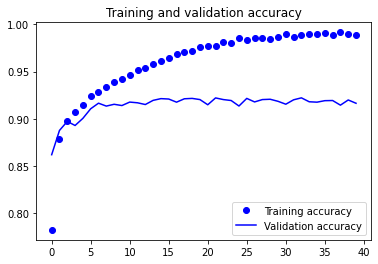

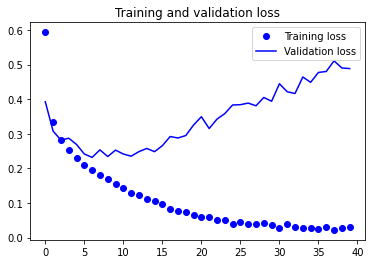

In [22]:
accuracy = fashion_train.history['accuracy']
val_accuracy = fashion_train.history['val_accuracy']
loss = fashion_train.history['loss']
val_loss = fashion_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


In [24]:
predicted_classes = fashion_model.predict(test_X)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
predicted_classes.shape, test_Y.shape


313/313 [==============================] - 1s 2ms/step


((10000,), (10000,))

Found 9094 correct labels


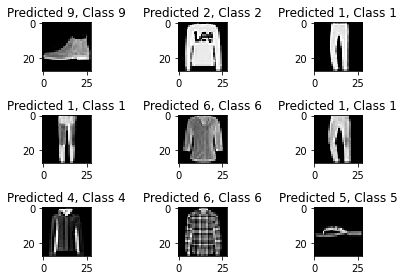

In [31]:
correct = np.where(predicted_classes==test_Y)[0]
print ("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], test_Y[correct]))
    plt.tight_layout()


Found 906 incorrect labels


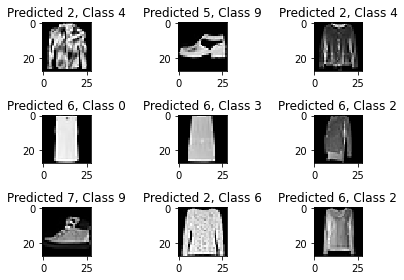

In [32]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print ("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], test_Y[incorrect]))
    plt.tight_layout()


In [33]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))


              precision    recall  f1-score   support

     Class 0       0.89      0.79      0.83      1000
     Class 1       0.99      0.98      0.99      1000
     Class 2       0.89      0.83      0.86      1000
     Class 3       0.92      0.92      0.92      1000
     Class 4       0.85      0.88      0.86      1000
     Class 5       0.99      0.98      0.98      1000
     Class 6       0.70      0.80      0.75      1000
     Class 7       0.94      0.98      0.96      1000
     Class 8       0.97      0.98      0.98      1000
     Class 9       0.98      0.95      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

